# Topic Modeling Diagrams

## Unigram Model Diagram

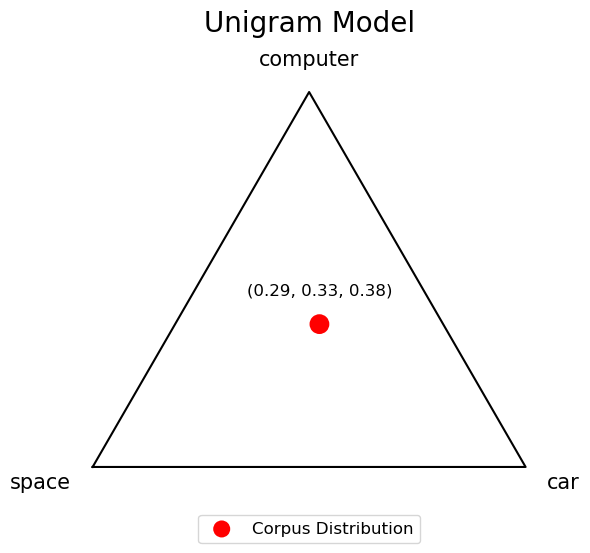

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Corpus with balanced but distinct topics
corpus = [
    "space space car computer",
    "space car computer",
    "car car space computer",
    "car space car",
    "computer computer space car",
    "computer computer computer",
]

# Vectorize the corpus
vectorizer = CountVectorizer(vocabulary=["space", "car", "computer"])
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
word_counts = X.toarray()

# Unigram Model: Single distribution based on word frequencies
unigram_probs = np.sum(word_counts, axis=0) / np.sum(word_counts)

# Function to convert probabilities to 2D simplex coordinates
def probs_to_simplex(probs):
    x = probs[:, 1] + 0.5 * probs[:, 2]
    y = np.sqrt(3) / 2 * probs[:, 2]
    return x, y

# Convert unigram probabilities to simplex coordinates
unigram_x, unigram_y = probs_to_simplex(np.array([unigram_probs]))

# Plotting the simplex visualization
fig, ax = plt.subplots(figsize=(6, 6.5))  # Height for title space

# Define triangle vertices
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Function to plot simplex triangle
def plot_simplex(ax):
    ax.plot([triangle[0, 0], triangle[1, 0], triangle[2, 0], triangle[0, 0]],
            [triangle[0, 1], triangle[1, 1], triangle[2, 1], triangle[0, 1]], 'k-')
    ax.text(-0.05, -0.05, feature_names[0], fontsize=15, ha='right')
    ax.text(1.05, -0.05, feature_names[1], fontsize=15, ha='left')
    ax.text(0.5, np.sqrt(3)/2 + 0.06, feature_names[2], fontsize=15, ha='center')
    ax.set_aspect('equal')
    ax.axis('off')

# Plot the unigram model
plot_simplex(ax)
ax.scatter(unigram_x, unigram_y, facecolors='red', edgecolors='none', s=150)
ax.scatter(unigram_x, unigram_y, facecolors='none', edgecolors='red', s=150, linewidth=2.0)
ax.text(unigram_x[0], unigram_y[0] + 0.06, 
        f'({unigram_probs[0]:.2f}, {unigram_probs[1]:.2f}, {unigram_probs[2]:.2f})', 
        fontsize=12, ha='center', va='bottom')
unigram_legend = ax.scatter([], [], facecolors='red', edgecolors='none', s=150, label='Corpus Distribution')
ax.legend(handles=[unigram_legend], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05))
ax.set_title("Unigram Model", fontsize=20, pad=30)

plt.tight_layout()
plt.savefig('unigram_model.png', dpi=300, bbox_inches='tight')
plt.show()

## Mixture of Unigrams Diagram

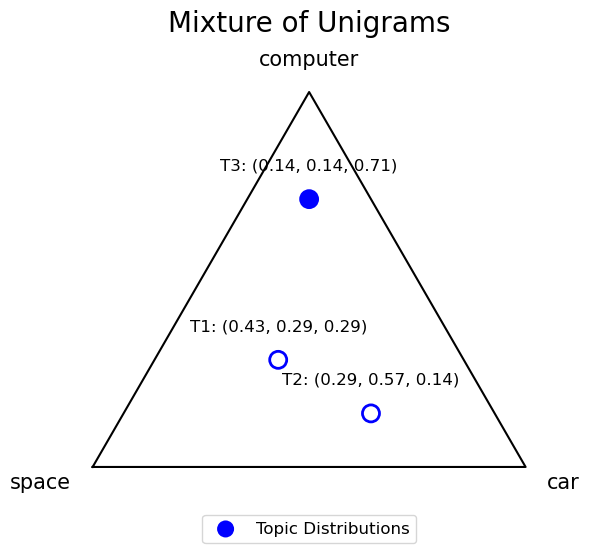

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Corpus with balanced but distinct topics
corpus = [
    "space space car computer",
    "space car computer",
    "car car space computer",
    "car space car",
    "computer computer space car",
    "computer computer computer",
]

# Vectorize the corpus
vectorizer = CountVectorizer(vocabulary=["space", "car", "computer"])
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
word_counts = X.toarray()

# Mixture of Unigrams: Hard clustering with controlled initialization
def mixture_of_unigrams(X, n_components, random_state=42):
    np.random.seed(random_state)
    n_docs, n_words = X.shape
    # Initialize clusters based on dominant words
    cluster_assignments = np.array([0, 0, 1, 1, 2, 2])  # Space, car, computer clusters
    topic_probs = np.zeros((n_components, n_words))
    for k in range(n_components):
        cluster_docs = X[cluster_assignments == k]
        topic_probs[k] = np.sum(cluster_docs, axis=0)
        topic_probs[k] /= topic_probs[k].sum() + 1e-10  # Normalize
    return topic_probs

# Compute mixture probabilities
n_topics = 3
mixture_probs = mixture_of_unigrams(word_counts, n_topics)

# Determine crispness for coloring (crisp if any word's probability >= 0.7)
crisp_threshold = 0.7
facecolors = ['blue' if np.any(probs >= crisp_threshold) else 'none' for probs in mixture_probs]
edgecolors = ['blue' for _ in mixture_probs]

# Function to convert probabilities to 2D simplex coordinates
def probs_to_simplex(probs):
    x = probs[:, 1] + 0.5 * probs[:, 2]
    y = np.sqrt(3) / 2 * probs[:, 2]
    return x, y

# Convert mixture probabilities to simplex coordinates
mixture_x, mixture_y = probs_to_simplex(mixture_probs)

# Plotting the simplex visualization
fig, ax = plt.subplots(figsize=(6, 6.5))  # Height for title space

# Define triangle vertices
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Function to plot simplex triangle
def plot_simplex(ax):
    ax.plot([triangle[0, 0], triangle[1, 0], triangle[2, 0], triangle[0, 0]],
            [triangle[0, 1], triangle[1, 1], triangle[2, 1], triangle[0, 1]], 'k-')
    ax.text(-0.05, -0.05, feature_names[0], fontsize=15, ha='right')
    ax.text(1.05, -0.05, feature_names[1], fontsize=15, ha='left')
    ax.text(0.5, np.sqrt(3)/2 + 0.06, feature_names[2], fontsize=15, ha='center')
    ax.set_aspect('equal')
    ax.axis('off')

# Plot the mixture of unigrams
plot_simplex(ax)
for i, (x, y, fc, ec) in enumerate(zip(mixture_x, mixture_y, facecolors, edgecolors)):
    ax.scatter(x, y, facecolors=fc, edgecolors='none', s=150)
    ax.scatter(x, y, facecolors='none', edgecolors=ec, s=150, linewidth=2.0)
    ax.text(x, y + 0.06, f'T{i+1}: ({mixture_probs[i][0]:.2f}, {mixture_probs[i][1]:.2f}, {mixture_probs[i][2]:.2f})', 
            fontsize=12, ha='center', va='bottom')
mixture_legend = ax.scatter([], [], facecolors='blue', edgecolors='none', s=150, label='Topic Distributions')
ax.legend(handles=[mixture_legend], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05))
ax.set_title("Mixture of Unigrams", fontsize=20, pad=30)

plt.tight_layout()
plt.savefig('mixture_model.png', dpi=300, bbox_inches='tight') 
plt.show()

## LDA Model Diagram

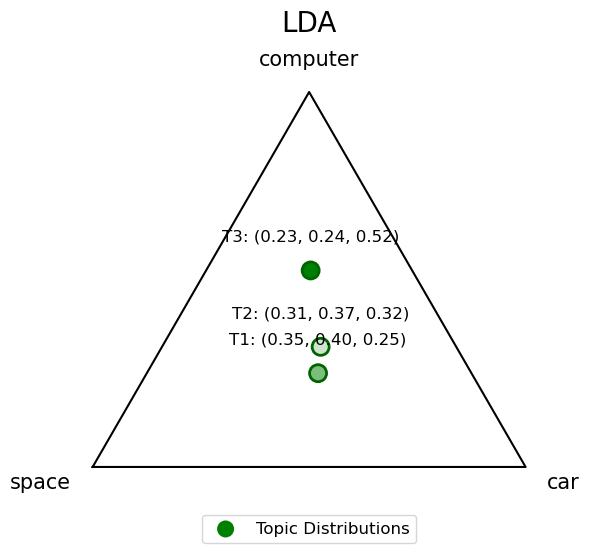

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Corpus with balanced but distinct topics
corpus = [
    "space space car computer",
    "space car computer",
    "car car space computer",
    "car space car",
    "computer computer space car",
    "computer computer computer",
]

# Vectorize the corpus
vectorizer = CountVectorizer(vocabulary=["space", "car", "computer"])
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

# LDA: Fit with higher priors
n_topics = 3
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42,
                               doc_topic_prior=1.0, topic_word_prior=1.0)
lda.fit(X)
lda_probs = lda.components_ / lda.components_.sum(axis=1, keepdims=True)

# Compute topic role as max document-topic probability and scale for transparency
doc_topic_dist = lda.transform(X)  # P(z|d) for each document
topic_roles = np.max(doc_topic_dist, axis=0)  # Max P(z|d) for each topic
# Scale to [0.2, 1.0] for visible but distinct transparency
lda_alphas = 0.2 + 0.8 * (topic_roles - np.min(topic_roles)) / (np.max(topic_roles) - np.min(topic_roles) + 1e-10)

# Function to convert probabilities to 2D simplex coordinates
def probs_to_simplex(probs):
    x = probs[:, 1] + 0.5 * probs[:, 2]
    y = np.sqrt(3) / 2 * probs[:, 2]
    return x, y

# Convert LDA probabilities to simplex coordinates
lda_x, lda_y = probs_to_simplex(lda_probs)

# Plotting the simplex visualization
fig, ax = plt.subplots(figsize=(6, 6.5))  # Height for title space

# Define triangle vertices
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Function to plot simplex triangle
def plot_simplex(ax):
    ax.plot([triangle[0, 0], triangle[1, 0], triangle[2, 0], triangle[0, 0]],
            [triangle[0, 1], triangle[1, 1], triangle[2, 1], triangle[0, 1]], 'k-')
    ax.text(-0.05, -0.05, feature_names[0], fontsize=15, ha='right')
    ax.text(1.05, -0.05, feature_names[1], fontsize=15, ha='left')
    ax.text(0.5, np.sqrt(3)/2 + 0.06, feature_names[2], fontsize=15, ha='center')
    ax.set_aspect('equal')
    ax.axis('off')

# Plot the LDA model
plot_simplex(ax)
for i, (x, y, alpha) in enumerate(zip(lda_x, lda_y, lda_alphas)):
    ax.scatter(x, y, facecolors='green', edgecolors='none', s=150, alpha=alpha)
    ax.scatter(x, y, facecolors='none', edgecolors='darkgreen', s=150, linewidth=2.0)
    ax.text(x, y + 0.06, f'T{i+1}: ({lda_probs[i][0]:.2f}, {lda_probs[i][1]:.2f}, {lda_probs[i][2]:.2f})', 
            fontsize=12, ha='center', va='bottom')
lda_legend = ax.scatter([], [], facecolors='green', edgecolors='none', s=150, label='Topic Distributions')
ax.legend(handles=[lda_legend], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05))
ax.set_title("LDA", fontsize=20, pad=30)

plt.tight_layout()
plt.savefig('lda_plot.png', dpi=300, bbox_inches='tight') 
plt.show()

## Subplot with Topic Distributions Over Documents

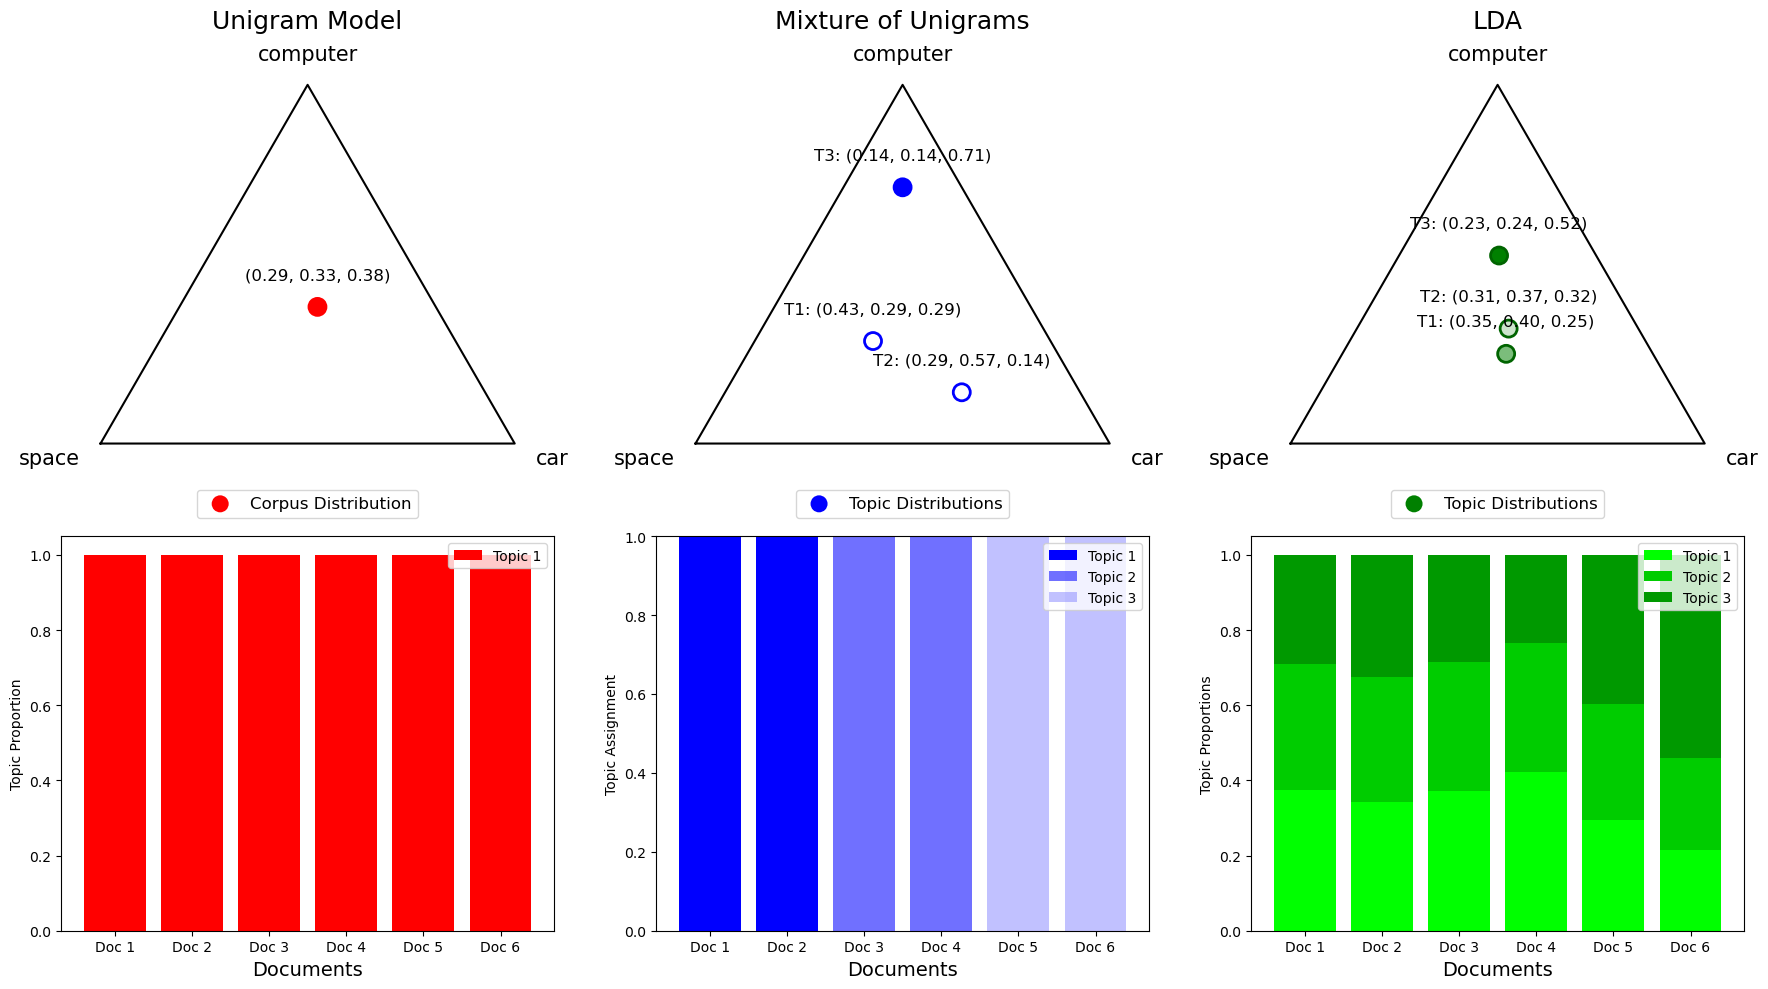

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Corpus with balanced but distinct topics
corpus = [
    "space space car computer",
    "space car computer",
    "car car space computer",
    "car space car",
    "computer computer space car",
    "computer computer computer",
]

# Vectorize the corpus
vectorizer = CountVectorizer(vocabulary=["space", "car", "computer"])
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
word_counts = X.toarray()

# Unigram Model: Single distribution based on word frequencies
unigram_probs = np.sum(word_counts, axis=0) / np.sum(word_counts)

# Mixture of Unigrams: Hard clustering with controlled initialization
def mixture_of_unigrams(X, n_components, random_state=42):
    np.random.seed(random_state)
    n_docs, n_words = X.shape
    cluster_assignments = np.array([0, 0, 1, 1, 2, 2])  # Space, car, computer clusters
    topic_probs = np.zeros((n_components, n_words))
    for k in range(n_components):
        cluster_docs = X[cluster_assignments == k]
        topic_probs[k] = np.sum(cluster_docs, axis=0)
        topic_probs[k] /= topic_probs[k].sum() + 1e-10  # Normalize
    return topic_probs, cluster_assignments

n_topics = 3
mixture_probs, mixture_assignments = mixture_of_unigrams(word_counts, n_topics)

# Determine crispness for Mixture of Unigrams
crisp_threshold = 0.7
facecolors = ['blue' if np.any(probs >= crisp_threshold) else 'none' for probs in mixture_probs]
edgecolors = ['blue' for _ in mixture_probs]

# LDA: Fit with higher priors
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42,
                               doc_topic_prior=1.0, topic_word_prior=1.0)
lda.fit(X)
lda_probs = lda.components_ / lda.components_.sum(axis=1, keepdims=True)

# Compute topic role as max document-topic probability and scale for transparency
doc_topic_dist = lda.transform(X)  # P(z|d) for each document
topic_roles = np.max(doc_topic_dist, axis=0)  # Max P(z|d) for each topic
lda_alphas = 0.2 + 0.8 * (topic_roles - np.min(topic_roles)) / (np.max(topic_roles) - np.min(topic_roles) + 1e-10)

# Function to convert probabilities to 2D simplex coordinates
def probs_to_simplex(probs):
    x = probs[:, 1] + 0.5 * probs[:, 2]
    y = np.sqrt(3) / 2 * probs[:, 2]
    return x, y

# Convert probabilities to simplex coordinates
unigram_x, unigram_y = probs_to_simplex(np.array([unigram_probs]))
mixture_x, mixture_y = probs_to_simplex(mixture_probs)
lda_x, lda_y = probs_to_simplex(lda_probs)

# Plotting the visualizations (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Define triangle vertices for simplex plots
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Function to plot simplex triangle
def plot_simplex(ax):
    ax.plot([triangle[0, 0], triangle[1, 0], triangle[2, 0], triangle[0, 0]],
            [triangle[0, 1], triangle[1, 1], triangle[2, 1], triangle[0, 1]], 'k-')
    ax.text(-0.05, -0.05, feature_names[0], fontsize=15, ha='right')
    ax.text(1.05, -0.05, feature_names[1], fontsize=15, ha='left')
    ax.text(0.5, np.sqrt(3)/2 + 0.06, feature_names[2], fontsize=15, ha='center')
    ax.set_aspect('equal')
    ax.axis('off')

# Unigram Plot (Top-left)
plot_simplex(axes[0, 0])
axes[0, 0].scatter(unigram_x, unigram_y, facecolors='red', edgecolors='none', s=150)
axes[0, 0].scatter(unigram_x, unigram_y, facecolors='none', edgecolors='red', s=150, linewidth=2.0)
axes[0, 0].text(unigram_x[0], unigram_y[0] + 0.06, 
                f'({unigram_probs[0]:.2f}, {unigram_probs[1]:.2f}, {unigram_probs[2]:.2f})', 
                fontsize=12, ha='center', va='bottom')
unigram_legend = axes[0, 0].scatter([], [], facecolors='red', edgecolors='none', s=150, label='Corpus Distribution')
axes[0, 0].legend(handles=[unigram_legend], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05))
axes[0, 0].set_title("Unigram Model", fontsize=18, pad=28)

# Mixture of Unigrams Plot (Top-middle)
plot_simplex(axes[0, 1])
for i, (x, y, fc, ec) in enumerate(zip(mixture_x, mixture_y, facecolors, edgecolors)):
    axes[0, 1].scatter(x, y, facecolors=fc, edgecolors='none', s=150)
    axes[0, 1].scatter(x, y, facecolors='none', edgecolors=ec, s=150, linewidth=2.0)
    axes[0, 1].text(x, y + 0.06, f'T{i+1}: ({mixture_probs[i][0]:.2f}, {mixture_probs[i][1]:.2f}, {mixture_probs[i][2]:.2f})', 
                    fontsize=12, ha='center', va='bottom')
mixture_legend = axes[0, 1].scatter([], [], facecolors='blue', edgecolors='none', s=150, label='Topic Distributions')
axes[0, 1].legend(handles=[mixture_legend], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05))
axes[0, 1].set_title("Mixture of Unigrams", fontsize=18, pad=28)

# LDA Plot (Top-right)
plot_simplex(axes[0, 2])
for i, (x, y, alpha) in enumerate(zip(lda_x, lda_y, lda_alphas)):
    axes[0, 2].scatter(x, y, facecolors='green', edgecolors='none', s=150, alpha=alpha)
    axes[0, 2].scatter(x, y, facecolors='none', edgecolors='darkgreen', s=150, linewidth=2.0)
    axes[0, 2].text(x, y + 0.06, f'T{i+1}: ({lda_probs[i][0]:.2f}, {lda_probs[i][1]:.2f}, {lda_probs[i][2]:.2f})', 
                    fontsize=12, ha='center', va='bottom')
lda_legend = axes[0, 2].scatter([], [], facecolors='green', edgecolors='none', s=150, label='Topic Distributions')
axes[0, 2].legend(handles=[lda_legend], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05))
axes[0, 2].set_title("LDA", fontsize=18, pad=28)

# Unigram Document-Topic Distribution Plot (Bottom-left)
doc_labels = [f'Doc {i+1}' for i in range(len(corpus))]
axes[1, 0].bar(doc_labels, np.ones(len(corpus)), color='red', label='Topic 1')
axes[1, 0].set_xlabel("Documents", fontsize=14)
axes[1, 0].set_ylabel("Topic Proportion")
axes[1, 0].legend()

# Mixture of Unigrams Document-Topic Assignment Plot (Bottom-middle)
topic_labels = [f'Topic {i+1}' for i in range(n_topics)]
colors = ['#0000FF', '#3333FF', '#6666FF']  # Blue shades
alphas = [1.0, 0.7, 0.4]
mixture_doc_topic = np.zeros((len(corpus), n_topics))
for d, k in enumerate(mixture_assignments):
    mixture_doc_topic[d, k] = 1.0
bottom = np.zeros(len(corpus))
for i in range(n_topics):
    axes[1, 1].bar(doc_labels, mixture_doc_topic[:, i], bottom=bottom, label=topic_labels[i], color=colors[i], alpha=alphas[i])
    bottom += mixture_doc_topic[:, i]
axes[1, 1].set_xlabel("Documents", fontsize=14)
axes[1, 1].set_ylabel("Topic Assignment")
axes[1, 1].legend()

# LDA Document-Topic Distribution Plot (Bottom-right)
colors = ['#00FF00', '#00CC00', '#009900']  # Green shades
bottom = np.zeros(len(corpus))
for i in range(n_topics):
    axes[1, 2].bar(doc_labels, doc_topic_dist[:, i], bottom=bottom, label=topic_labels[i], color=colors[i])
    bottom += doc_topic_dist[:, i]
axes[1, 2].set_xlabel("Documents", fontsize=14)
axes[1, 2].set_ylabel("Topic Proportions")
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('subplot_with_topic_dists.png', dpi=300, bbox_inches='tight') 
plt.show()

## LDA Subplot with Varying $\mathbf{\alpha}$ and $\mathbf{\beta}$

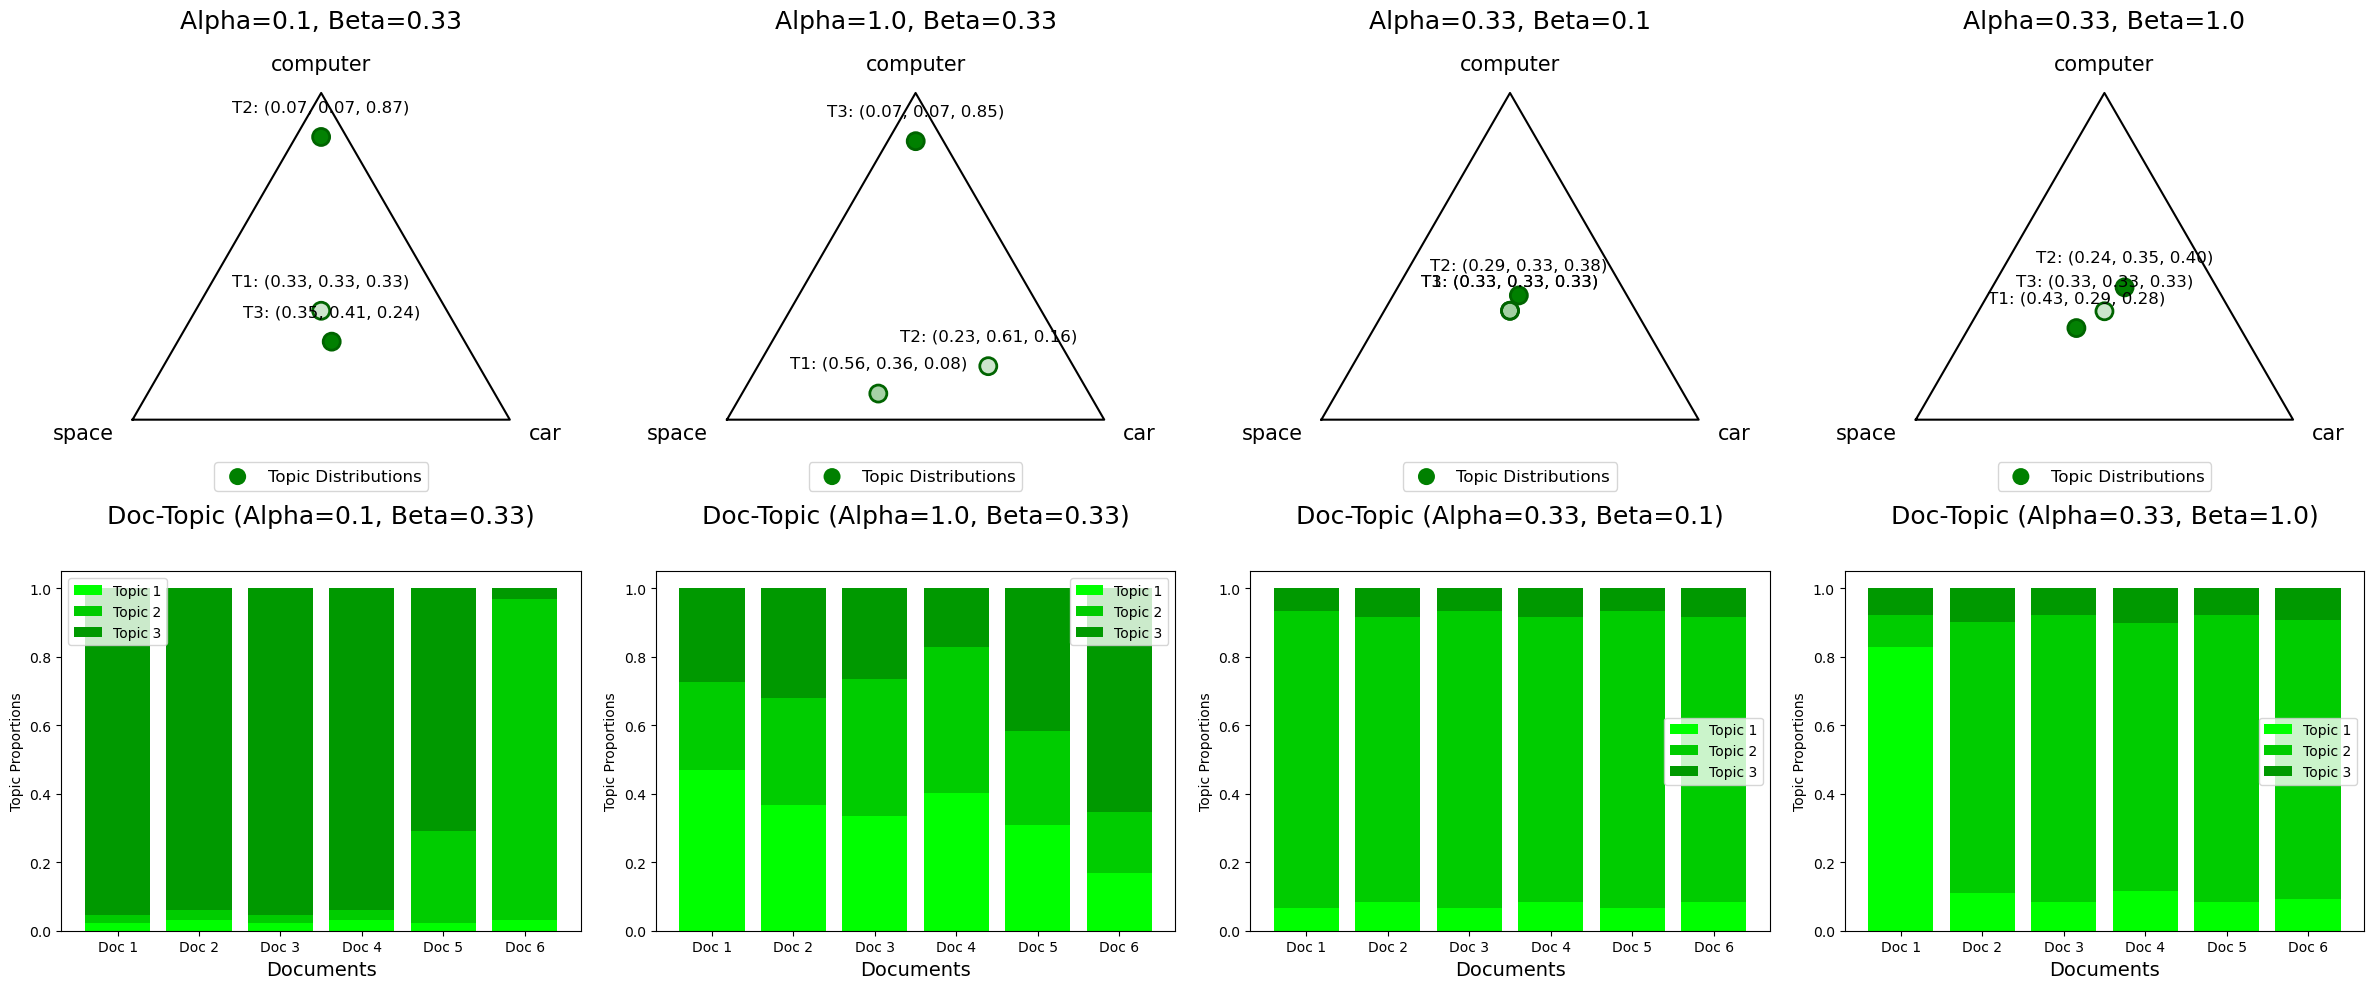

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Corpus with balanced but distinct topics
corpus = [
    "space space car computer",
    "space car computer",
    "car car space computer",
    "car space car",
    "computer computer space car",
    "computer computer computer",
]

# Vectorize the corpus
vectorizer = CountVectorizer(vocabulary=["space", "car", "computer"])
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

# Define hyperparameter settings
alpha_values = [0.1, 1.0]  # Vary alpha for first two columns
beta_values = [0.1, 1.0]   # Vary beta for last two columns
constant_beta = 1/3        # Constant beta for alpha variation
constant_alpha = 1/3       # Constant alpha for beta variation
n_topics = 3

# Fit LDA models for each hyperparameter setting
lda_models = []
doc_topic_dists = []
for alpha in alpha_values:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42,
                                    doc_topic_prior=alpha, topic_word_prior=constant_beta)
    lda.fit(X)
    lda_models.append(lda)
    doc_topic_dists.append(lda.transform(X))
for beta in beta_values:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42,
                                    doc_topic_prior=constant_alpha, topic_word_prior=beta)
    lda.fit(X)
    lda_models.append(lda)
    doc_topic_dists.append(lda.transform(X))

# Compute topic-word probabilities and topic roles
lda_probs_list = [lda.components_ / lda.components_.sum(axis=1, keepdims=True) for lda in lda_models]
topic_roles_list = [np.max(doc_topic_dist, axis=0) for doc_topic_dist in doc_topic_dists]
lda_alphas_list = [
    0.2 + 0.8 * (roles - np.min(roles)) / (np.max(roles) - np.min(roles) + 1e-10)
    for roles in topic_roles_list
]

# Function to convert probabilities to 2D simplex coordinates
def probs_to_simplex(probs):
    x = probs[:, 1] + 0.5 * probs[:, 2]
    y = np.sqrt(3) / 2 * probs[:, 2]
    return x, y

# Convert probabilities to simplex coordinates
lda_xy_list = [probs_to_simplex(probs) for probs in lda_probs_list]

# Plotting the visualizations (2x4 grid)
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

# Define triangle vertices for simplex plots
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Function to plot simplex triangle
def plot_simplex(ax):
    ax.plot([triangle[0, 0], triangle[1, 0], triangle[2, 0], triangle[0, 0]],
            [triangle[0, 1], triangle[1, 1], triangle[2, 1], triangle[0, 1]], 'k-')
    ax.text(-0.05, -0.05, feature_names[0], fontsize=15, ha='right')
    ax.text(1.05, -0.05, feature_names[1], fontsize=15, ha='left')
    ax.text(0.5, np.sqrt(3)/2 + 0.06, feature_names[2], fontsize=15, ha='center')
    ax.set_aspect('equal')
    ax.axis('off')

# Simplex Plots (Top row)
labels = [
    f"Alpha={alpha_values[0]}, Beta={constant_beta:.2f}",
    f"Alpha={alpha_values[1]}, Beta={constant_beta:.2f}",
    f"Alpha={constant_alpha:.2f}, Beta={beta_values[0]}",
    f"Alpha={constant_alpha:.2f}, Beta={beta_values[1]}"
]
for i, ((lda_x, lda_y), lda_probs, lda_alphas) in enumerate(zip(lda_xy_list, lda_probs_list, lda_alphas_list)):
    plot_simplex(axes[0, i])
    for j, (x, y, alpha) in enumerate(zip(lda_x, lda_y, lda_alphas)):
        axes[0, i].scatter(x, y, facecolors='green', edgecolors='none', s=150, alpha=alpha)
        axes[0, i].scatter(x, y, facecolors='none', edgecolors='darkgreen', s=150, linewidth=2.0)
        axes[0, i].text(x, y + 0.06, f'T{j+1}: ({lda_probs[j][0]:.2f}, {lda_probs[j][1]:.2f}, {lda_probs[j][2]:.2f})', 
                        fontsize=12, ha='center', va='bottom')
    lda_legend = axes[0, i].scatter([], [], facecolors='green', edgecolors='none', s=150, label='Topic Distributions')
    axes[0, i].legend(handles=[lda_legend], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05))
    axes[0, i].set_title(labels[i], fontsize=18, pad=35)

# Document-Topic Distribution Plots (Bottom row)
doc_labels = [f'Doc {i+1}' for i in range(len(corpus))]
topic_labels = [f'Topic {i+1}' for i in range(n_topics)]
colors = ['#00FF00', '#00CC00', '#009900']  # Green shades
for i, doc_topic_dist in enumerate(doc_topic_dists):
    bottom = np.zeros(len(corpus))
    for j in range(n_topics):
        axes[1, i].bar(doc_labels, doc_topic_dist[:, j], bottom=bottom, label=topic_labels[j], color=colors[j])
        bottom += doc_topic_dist[:, j]
    axes[1, i].set_xlabel("Documents", fontsize=14)
    axes[1, i].set_ylabel("Topic Proportions")
    axes[1, i].legend()
    axes[1, i].set_title(f"Doc-Topic ({labels[i]})", fontsize=18, pad=35)

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.4)  # Vertical spacing between rows
plt.tight_layout()
plt.savefig('lda_with_params_varied.png', dpi=300, bbox_inches='tight')
plt.show()